<a href="https://colab.research.google.com/github/Tejasri1557/ADM_2025/blob/main/2303a51557_ASSN_04_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
df=pd.read_csv("/content/tweets.csv.zip")
df.head(100)
df.shape

(11370, 5)

In [ ]:
X = df["text"]
y = df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report

print("\n================ Evaluation ================")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


================ Evaluation ================
Accuracy: 0.861

Classification Report:
               precision    recall  f1-score   support

           0     0.9424    0.8833    0.9119      1851
           1     0.5993    0.7636    0.6715       423

    accuracy                         0.8610      2274
   macro avg     0.7708    0.8234    0.7917      2274
weighted avg     0.8785    0.8610    0.8672      2274



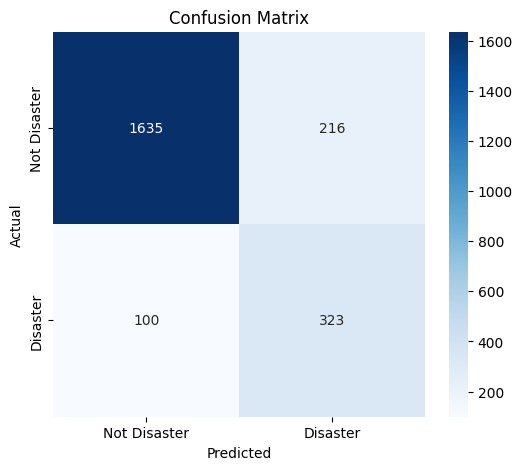

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Disaster", "Disaster"],
            yticklabels=["Not Disaster", "Disaster"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

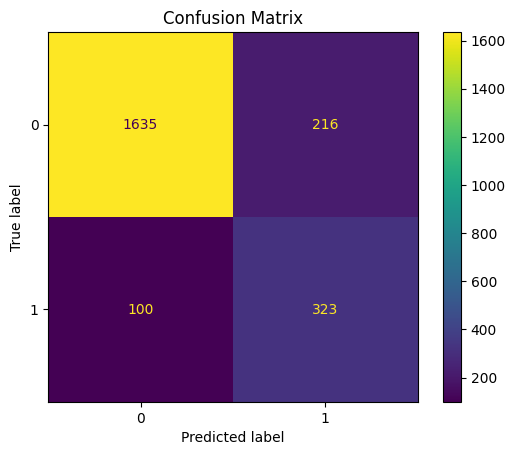

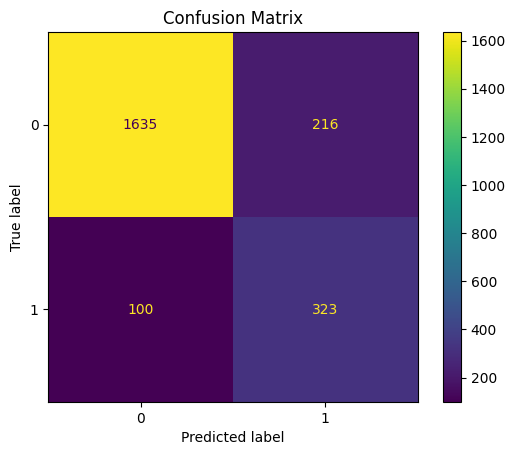

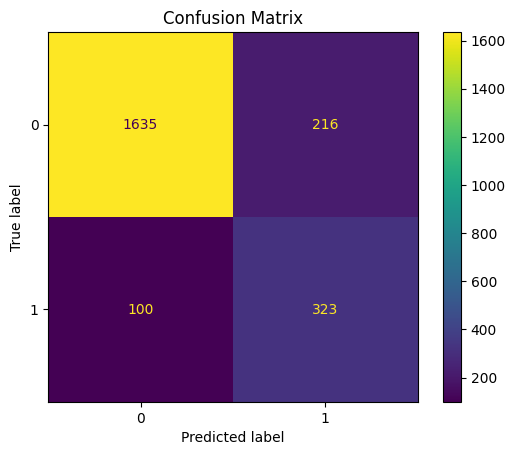

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for tfidf_matrix1
cm1 = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot()
plt.title('Confusion Matrix')
plt.show()

# Confusion Matrix for tfidf_matrix2
cm2 = confusion_matrix(y_test, y_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.title('Confusion Matrix')
plt.show()

# Confusion Matrix for tfidf_matrix3
cm3 = confusion_matrix(y_test, y_pred)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot()
plt.title('Confusion Matrix')
plt.show()